# Machine Learning para Detecção do Câncer de Mama

O uso e a busca por novas tecnologias como Machine Leanirng, inteligência artifical e aplicações de modelos de inteligencia computacional para contribuir com diagnósticos mais rápidos e precisos tem crescido cada vez mais. Segundo a pesquisa da Agência Internacional de Pesquisa em Câncer (IARC) do ano de 2018, o câncer de mama era o quinto em questão de mortalidade no mundo, sendo estimadas mais de 627 mil mortes em 2018, o que representa 6,6% do total de mortes por todos os tipos da doença. Em 2019, foram estimados 59.700 novos casos em mulheres, o que representa uma taxa de incidência de 51,29 casos por 100 mil mulheres.

O principal objetivo do uso de tecnologias como Machine Learning é melhorar a precisão e a velocidade que são feitos os diagnósticos, sendo os diagnósticos precose da doença os principais fatores para reduzir a mortalidade por câncer. Com o diagnóstico precose as chances de curas chegam a 95%.

Nesse projeto de Data Science foi construido um modelo de Machine Learning capaz de detectar o câncer de mama.

Etapas do Projeto

* Coletas do dados
    - Importar o dataset da web
    - Leitura do Arquivo
    - Importar os pacotes e datasets
* Limpeza e preparação dos dados
* Exploração dos dados
* Modelagem dos dados
* Algoritimos de Machine Learning
* Avaliar desempenho dos modelos usando as metricas corretas

In [74]:
# pacotes que serão utiilizados

# scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Desativando os avisos sobre as bibliotecas depreciadas

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


## Coleta dos dados

### Importando o dataset da web

Coleta dos dados, utilizando a biblioteca selenium:

In [63]:
# Acessando o site para extração da base de dados
driver = webdriver.Chrome()
driver.get("https://www.kaggle.com/uciml/breast-cancer-wisconsin-data")
time.sleep(3)

# Clicando no botão de download, como será necessário login, a página será redirecionada.
xpath_btn_download = driver.find_element(By.XPATH, '//*[@id="site-content"]/div[3]/div[2]/div[3]/div[2]/div/div[2]/div/div[1]/div[2]/i').click()
time.sleep(2)
login_via_email = driver.find_element(By.XPATH, '//*[@id="site-container"]/div[1]/div/form/div[2]/div/div[2]/a').click()

# Acessando e Preenchendo o Formulário de login
usuario = 'lucasramalhon@yahoo.com.br'
senha = 'Wipro0110*'
time.sleep(1)
login = driver.find_element(By.XPATH,'//*[@id="site-container"]/div[1]/div/form/div[2]/div[1]/div/label/input').send_keys(usuario)
time.sleep(1)
senha = driver.find_element(By.XPATH,'//*[@id="site-container"]/div[1]/div/form/div[2]/div[2]/div/label/input').send_keys(senha)
time.sleep(1)
sign_in = driver.find_element(By.XPATH, '//*[@id="site-container"]/div[1]/div/form/div[2]/div[3]/button').click()

# Clicando no botão de Download para baixar o arquivo
time.sleep(5)
xpath_btn_download = driver.find_element(By.XPATH,'//*[@id="site-content"]/div[3]/div[2]/div[3]/div[2]/div/div[2]/div/div[1]/div[2]/i').click()
time.sleep(5)


# Lendo o arquivo baixado na pasta de downloads do computador
dados = r'C:\Users\lucas\Downloads\data.csv'
df = pd.read_csv(dados, sep = ',')
display(df)

### Leitura do Arquivo

In [66]:
dados = 'data.csv'
df = pd.read_csv(dados, sep = ',')

# Dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

# Verificando as primeira linhas do dataset
df.head(10)

Linhas: 569
Colunas: 33


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### Deletando colunas

Irei deletar uma coluna que apresenta erro e a de id que não relevantes para o projeto 

In [67]:
df = df.drop(['id', 'Unnamed: 32'], axis = 'columns')

### Verificando os tipos de dados das colunas

In [68]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Verificando dados ausentes ou faltantes

In [69]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Informações sobre os atributos

Além de tratar o dataset e realizar a limpeza do mesmo, é muito importante saber com quais variáveis estamos trabalhando

<b>Informações sobre os atributos:</b>

- A coluna <b>id</b> representa o número de identificação.
- A coluna <b>diagnosis</b> é a variável alvo(o que quremos prever).
       * M - Maligno
       * B - Benigno
- Radius - representa a média das distâncias do centro aos pontos do perímetro
- Texture - representa o desvio padrão dos valores da escala de cinza
- Perimeter - (Perímetro)
- Area - (Área)
- Smoothness_mean - representa a variação local nos comprimentos do raio
- Compactness - representa o perímetro ^2 / area - 1.0)
- Concavity - representa a severidade das porções côncavas do contorno
- Concave points - representa o número de porções côncavas do contorno
- symmetry_mean
- fractal_dimension - representa a aproximação da costa - 1



<b>Conclusão</b>

Feita a análise incial foi possível verificar que o dataset não possui valores faltantes, além de não ter sido encontrado nenhum problema com o conjunto de dados. Dessa forma, nesse caso, não será gasto muito tempo com a limpeza dos dados (sabendo que este é um dos processos que podem demandar mais tempo do cientista, no dia a dia).  

## Análise Exploratória

A análise será feita inicialmente com a variável alvo <b>diagnosis</b>. Iremos verificar o balanceamento do dataset

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


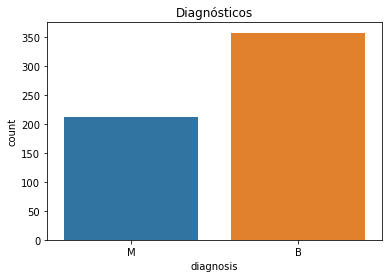

Diagnósticos: 
B    357
M    212
Name: diagnosis, dtype: int64


In [73]:


#Verificando balanceamento do dataser

plt.figure()
ax = sns.countplot('diagnosis', data=df)
ax.set_title('Diagnósticos')
plt.show()

print('Diagnósticos: ')
print(df["diagnosis"].value_counts())

<b>Podemos considerar que o balanceamento não é ideal, podendo ser treinados mais casos benignos do que malignos. Irei seguir o teste desta forma e analisar os resultados, posteriormente, caso necessário irei aplicar uma técnica de balanceamento e comparar os resultados obtidos</b>

Ao criar um modelo de machine learning, antes da definição das variaveis de entrada e saída é importante analisar a correlação das variáveis e como está a distribuição das mesmas. Esse tipo de informação é importante para entender o que está contecendo com os dados

# Resumo estatístico das variáveis numéricas



In [76]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [77]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


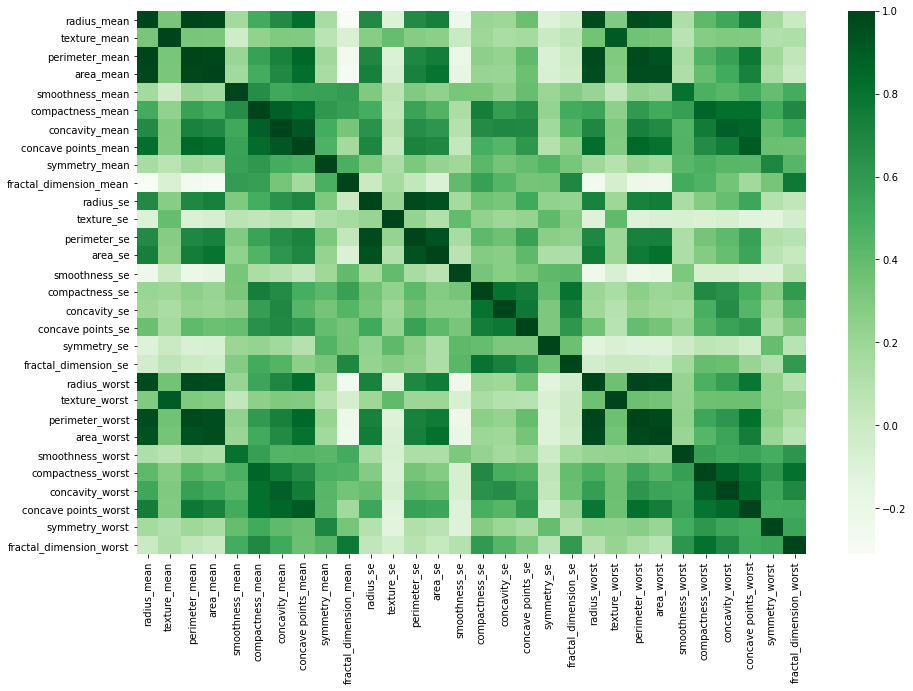

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='Greens', annot=False)

plt.show()

## Preparação dos dados

Para padronizar os dados numéricos que irão alimentar o modelo de Machine Learning, irei utilizar o StandardScaler, visto que nossa variável alvo é categórica usaremos o LabelEncoder para devida conversão do nosso eixo y.

Feito o pré-processamento dos dados, irei, como em todo processo de Machine Learning, dividir o dataset em Treino e Teste.

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modelo de Machine Learning para detecção do câncer de mama

Soluções de Machine Learning para detecção do câncer de mama precisa ser alimentada com diversas variáveis independentes, ou seja, diversos dados de entrada, para poder classificar corretamente um tumor entre benigno e maligno.

Será utilizado um modelo do tipo Random Forest (Floresta Aleatória) devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

O algoritmo Random Forest, que usa métodos ensemble, é responsável por criar uma combinação de várias árvores de decisão, uma "floresta" literalmente, verificando qual combinação apresenta melhor desempenho e acurácia.

In [82]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)

# treinando o modelo 
ml_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

## Desempenho do modelo de detecção de câncer de mama 

Lembre-se de se atentar aos seus dados e a confiança que você construiu para o modelo, preparando e explorando os dados, até chegar na previsão do modelo. Por que nem sempre uma excelente acurácia vai significar que seu modelo está bom. A qualidade e confiança da previsão do modelo está diretamente ligada ao dados de entrada que foram passados.

Além da métrica de acurácia vou usar a função classification_report para ver ver o desempenho do modelo sobre as métricas de precisão, recall, f1-score e support.

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9532163742690059

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       110
           1       0.93      0.93      0.93        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Nota-se que o modelo está com ótimos valores nas métricas consideradas. Mas como foi dito anteriormente, nem sempre uma excelente acurácia vai significar que seu modelo está bom<br>


Pra finalizar vamos observar uma matriz de confusão. Exemplificando, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

In [84]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,106,4
pos,4,57


O modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 96% e lidou muito bem com ambas as classes.<br>

Avanços e buscas por melhores tecnologias ocorrem a todo momento, principalmente na área da saúde. O uso do Machine Learning é de extrema importância para ajudar cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos concencionais e diminuição da taxa de mortalidade.